# 官方教程 - 10分钟入门pandas

> 教程译自[10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/version/0.18.0/10min.html)，有删改，[点击直达最新文档地址](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

```{admonition} 在线刷题
:class: seealso

检查 or 强化 `Pandas` 数据分析操作？<a href="https://www.heywhale.com/mw/project/6146c0318447b8001769ff20" target="_blank">👉在线体验「Pandas进阶修炼300题」</a>
```

```{note} 
本页面代码可以[在线编辑、执行](../指引/在线执行.md)！

首先导入 Python 数据处理中常用的三个库，如果没有需要提前使用 `pip` 安装

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

注：本教程基于Pandas0.18.0版本，因版本不同可能有些代码无法成功执行，请自行查阅解决办法

## 创建数据

使用pd.Series创建Series对象

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过numpy的array数据来创建DataFrame对象

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,-0.356799,0.344318,1.301697,-0.636051
2013-01-02,-0.314149,0.055696,-0.109157,-2.328310
2013-01-03,2.169560,0.582531,0.541038,0.334899
2013-01-04,-0.968474,-1.655802,0.263103,2.088682
2013-01-05,0.267152,-0.876826,1.320242,0.613501
2013-01-06,1.016336,1.628646,-0.709091,0.033272


通过字典创建DataFrame对象

In [8]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [11]:
dir(df2)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '_

## 数据查看

基本方法，务必掌握，更多相关查看数据的方法可以参与[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics)

下面分别是查看数据的顶部和尾部的方法

In [12]:
df.head()

,A,B,C,D
2013-01-01,-0.356799,0.344318,1.301697,-0.636051
2013-01-02,-0.314149,0.055696,-0.109157,-2.328310
2013-01-03,2.169560,0.582531,0.541038,0.334899
2013-01-04,-0.968474,-1.655802,0.263103,2.088682
2013-01-05,0.267152,-0.876826,1.320242,0.613501


In [13]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.968474,-1.655802,0.263103,2.088682
2013-01-05,0.267152,-0.876826,1.320242,0.613501
2013-01-06,1.016336,1.628646,-0.709091,0.033272


查看DataFrame对象的索引，列名，数据信息

In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[-0.35679892,  0.34431818,  1.30169724, -0.6360505 ],
       [-0.31414933,  0.05569566, -0.10915691, -2.3283097 ],
       [ 2.16956038,  0.58253123,  0.54103821,  0.33489885],
       [-0.96847424, -1.65580197,  0.26310283,  2.08868239],
       [ 0.26715228, -0.87682606,  1.32024152,  0.61350119],
       [ 1.01633623,  1.62864579, -0.70909064,  0.03327248]])

描述性统计

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.302271,0.013094,0.434639,0.017666
std,1.133758,1.150909,0.797579,1.461229
min,-0.968474,-1.655802,-0.709091,-2.328310
25%,-0.346137,-0.643696,-0.016092,-0.468720
50%,-0.023499,0.200007,0.402071,0.184086
75%,0.829040,0.522978,1.111532,0.543851
max,2.169560,1.628646,1.320242,2.088682


数据转置

In [18]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.356799,-0.314149,2.169560,-0.968474,0.267152,1.016336
B,0.344318,0.055696,0.582531,-1.655802,-0.876826,1.628646
C,1.301697,-0.109157,0.541038,0.263103,1.320242,-0.709091
D,-0.636051,-2.328310,0.334899,2.088682,0.613501,0.033272


根据列名排序

In [19]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.636051,1.301697,0.344318,-0.356799
2013-01-02,-2.328310,-0.109157,0.055696,-0.314149
2013-01-03,0.334899,0.541038,0.582531,2.169560
2013-01-04,2.088682,0.263103,-1.655802,-0.968474
2013-01-05,0.613501,1.320242,-0.876826,0.267152
2013-01-06,0.033272,-0.709091,1.628646,1.016336


根据B列数值排序

In [20]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-0.968474,-1.655802,0.263103,2.088682
2013-01-05,0.267152,-0.876826,1.320242,0.613501
2013-01-02,-0.314149,0.055696,-0.109157,-2.328310
2013-01-01,-0.356799,0.344318,1.301697,-0.636051
2013-01-03,2.169560,0.582531,0.541038,0.334899
2013-01-06,1.016336,1.628646,-0.709091,0.033272


## 数据选取

官方建议使用优化的熊猫数据访问方法`.at，.iat，.loc`和`.iloc`，部分较早的pandas版本可以使用`.ix`

这些选取函数的使用需要熟练掌握，我也曾写过相关文章帮助理解

- [5分钟学会Pandas中iloc/loc/ix区别](https://mp.weixin.qq.com/s/5xJ-VLaHCV9qX2AMNOLRtw)

### 使用\[\]选取数据

选取单列数据，等效于`df.A`:

In [21]:
df['A']

2013-01-01   -0.356799
2013-01-02   -0.314149
2013-01-03    2.169560
2013-01-04   -0.968474
2013-01-05    0.267152
2013-01-06    1.016336
Freq: D, Name: A, dtype: float64

按行选取数据，使用[]

In [22]:
df[0:3]

,A,B,C,D
2013-01-01,-0.356799,0.344318,1.301697,-0.636051
2013-01-02,-0.314149,0.055696,-0.109157,-2.328310
2013-01-03,2.169560,0.582531,0.541038,0.334899


In [23]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.314149,0.055696,-0.109157,-2.328310
2013-01-03,2.169560,0.582531,0.541038,0.334899
2013-01-04,-0.968474,-1.655802,0.263103,2.088682


### 通过标签选取数据

In [24]:
df.loc[dates[0]]

A   -0.356799
B    0.344318
C    1.301697
D   -0.636051
Name: 2013-01-01 00:00:00, dtype: float64

In [25]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.356799,0.344318
2013-01-02,-0.314149,0.055696
2013-01-03,2.169560,0.582531
2013-01-04,-0.968474,-1.655802
2013-01-05,0.267152,-0.876826
2013-01-06,1.016336,1.628646


In [26]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.314149,0.055696
2013-01-03,2.169560,0.582531
2013-01-04,-0.968474,-1.655802


In [27]:
df.loc['20130102',['A','B']]

A   -0.314149
B    0.055696
Name: 2013-01-02 00:00:00, dtype: float64

In [28]:
df.loc[dates[0],'A']

-0.3567989220073626

In [29]:
df.at[dates[0],'A']

-0.3567989220073626

### 通过位置选取数据

In [30]:
df.iloc[3]

A   -0.968474
B   -1.655802
C    0.263103
D    2.088682
Name: 2013-01-04 00:00:00, dtype: float64

In [31]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.968474,-1.655802
2013-01-05,0.267152,-0.876826


In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.314149,-0.109157
2013-01-03,2.169560,0.541038
2013-01-05,0.267152,1.320242


In [33]:
df.iloc[1:3]

,A,B,C,D
2013-01-02,-0.314149,0.055696,-0.109157,-2.328310
2013-01-03,2.169560,0.582531,0.541038,0.334899


In [34]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.344318,1.301697
2013-01-02,0.055696,-0.109157
2013-01-03,0.582531,0.541038
2013-01-04,-1.655802,0.263103
2013-01-05,-0.876826,1.320242
2013-01-06,1.628646,-0.709091


In [35]:
df.iloc[1, 1]

0.055695661880919324

In [36]:
df.iat[1, 1]

0.055695661880919324

### 使用布尔索引 

In [37]:
df[df.A>0]

,A,B,C,D
2013-01-03,2.169560,0.582531,0.541038,0.334899
2013-01-05,0.267152,-0.876826,1.320242,0.613501
2013-01-06,1.016336,1.628646,-0.709091,0.033272


In [38]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,0.344318,1.301697,NaN
2013-01-02,NaN,0.055696,NaN,NaN
2013-01-03,2.169560,0.582531,0.541038,0.334899
2013-01-04,NaN,NaN,0.263103,2.088682
2013-01-05,0.267152,NaN,1.320242,0.613501
2013-01-06,1.016336,1.628646,NaN,0.033272


In [39]:
df2 = df.copy()

In [40]:
df2['E'] = ['one', 'one','two','three','four','three']

In [41]:
df2

,A,B,C,D,E
2013-01-01,-0.356799,0.344318,1.301697,-0.636051,one
2013-01-02,-0.314149,0.055696,-0.109157,-2.328310,one
2013-01-03,2.169560,0.582531,0.541038,0.334899,two
2013-01-04,-0.968474,-1.655802,0.263103,2.088682,three
2013-01-05,0.267152,-0.876826,1.320242,0.613501,four
2013-01-06,1.016336,1.628646,-0.709091,0.033272,three


In [42]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,2.169560,0.582531,0.541038,0.334899,two
2013-01-05,0.267152,-0.876826,1.320242,0.613501,four


## 缺失值处理

**reindex**

Pandas中使用`np.nan`来表示缺失值，可以使用`reindex`更改/添加/删除指定轴上的索引

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [44]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [45]:
df1

,A,B,C,D,E
2013-01-01,-0.356799,0.344318,1.301697,-0.636051,1.0
2013-01-02,-0.314149,0.055696,-0.109157,-2.328310,1.0
2013-01-03,2.169560,0.582531,0.541038,0.334899,NaN
2013-01-04,-0.968474,-1.655802,0.263103,2.088682,NaN


### 删除缺失值
舍弃含有NaN的行

In [46]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.356799,0.344318,1.301697,-0.636051,1.0
2013-01-02,-0.314149,0.055696,-0.109157,-2.328310,1.0


### 填充缺失值
填充缺失数据

In [47]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.356799,0.344318,1.301697,-0.636051,1.0
2013-01-02,-0.314149,0.055696,-0.109157,-2.328310,1.0
2013-01-03,2.169560,0.582531,0.541038,0.334899,5.0
2013-01-04,-0.968474,-1.655802,0.263103,2.088682,5.0


In [48]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## 常用操作

在我的[Pandas120题](https://mp.weixin.qq.com/s/xgqmjTt4nxHJJZCE7acDhw)系列中有很多关于Pandas常用操作介绍！

欢迎微信搜索公众号【早起Python】关注

后台回复pandas获取相关习题！

### 统计

在进行统计操作时需要排除缺失值！

**描述性统计👇**

纵向求均值

In [49]:
df.mean()

A    0.302271
B    0.013094
C    0.434639
D    0.017666
dtype: float64

横向求均值

In [50]:
df.mean(1)

2013-01-01    0.163291
2013-01-02   -0.673980
2013-01-03    0.907007
2013-01-04   -0.068123
2013-01-05    0.331017
2013-01-06    0.492291
Freq: D, dtype: float64

In [51]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [52]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [53]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,1.169560,-0.417469,-0.458962,-0.665101
2013-01-04,-3.968474,-4.655802,-2.736897,-0.911318
2013-01-05,-4.732848,-5.876826,-3.679758,-4.386499
2013-01-06,NaN,NaN,NaN,NaN


### Apply函数

In [54]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-0.356799,0.344318,1.301697,-0.636051
2013-01-02,-0.670948,0.400014,1.192540,-2.964360
2013-01-03,1.498612,0.982545,1.733579,-2.629461
2013-01-04,0.530138,-0.673257,1.996681,-0.540779
2013-01-05,0.797290,-1.550083,3.316923,0.072722
2013-01-06,1.813626,0.078563,2.607832,0.105995


In [55]:
df.apply(lambda x: x.max() - x.min())

A    3.138035
B    3.284448
C    2.029332
D    4.416992
dtype: float64

### value_counts()

文档中为`Histogramming`，但示例就是`.value_counts()`的使用

In [56]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [57]:
s

0    1
1    4
2    4
3    4
4    3
5    1
6    4
7    4
8    2
9    3
dtype: int64

In [58]:
s.value_counts()

4    5
3    2
1    2
2    1
dtype: int64

### 字符串方法

In [59]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [60]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 数据合并

### Concat

在连接/合并类型操作的情况下，pandas提供了各种功能，可以轻松地将Series和DataFrame对象与各种用于索引和关系代数功能的集合逻辑组合在一起。

In [61]:
df = pd.DataFrame(np.random.randn(10, 4))

In [62]:
df

,0,1,2,3
0,0.056809,-0.206871,0.812512,0.768987
1,0.002169,-2.094984,1.705561,-0.642830
2,-0.959921,0.168379,0.135167,0.588653
3,0.335299,0.498803,0.763579,0.643757
4,-2.277021,0.670947,1.239693,-0.129349
5,0.736242,0.500368,-0.726722,-0.406449
6,-0.150920,0.146972,-0.418980,-0.180205
7,-1.159818,0.561159,0.083007,-0.878281
8,0.497128,0.453451,1.520451,-0.815085
9,-1.133593,1.746638,1.157964,1.164609


In [63]:
pieces = [df[:3], df[3:6], df[7:]]

In [64]:
pd.concat(pieces)

,0,1,2,3
0,0.056809,-0.206871,0.812512,0.768987
1,0.002169,-2.094984,1.705561,-0.642830
2,-0.959921,0.168379,0.135167,0.588653
3,0.335299,0.498803,0.763579,0.643757
4,-2.277021,0.670947,1.239693,-0.129349
5,0.736242,0.500368,-0.726722,-0.406449
7,-1.159818,0.561159,0.083007,-0.878281
8,0.497128,0.453451,1.520451,-0.815085
9,-1.133593,1.746638,1.157964,1.164609


**注意**

将列添加到DataFrame相对较快。 

但是，添加一行需要一个副本，并且可能浪费时间

我们建议将预构建的记录列表传递给DataFrame构造函数，而不是通过迭代地将记录追加到其来构建DataFrame

### Join

In [65]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [66]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [67]:
left

,key,lval
0,foo,1
1,foo,2


In [68]:
right

,key,rval
0,foo,4
1,foo,5


In [69]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

In [70]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [71]:
df

,A,B,C,D
0,1.212649,-0.235387,-0.058957,0.674536
1,1.179328,0.085295,0.607151,1.123455
2,-0.921855,-1.477486,-2.128001,0.456017
3,1.577136,0.513541,-2.239580,-0.931746
4,0.927558,0.211699,-0.569655,-1.581698
5,-0.965280,1.602170,-0.601018,-0.128616
6,-0.247286,0.799717,-1.404615,0.188773
7,0.011248,0.513956,0.844940,0.363820


In [72]:
s = df.iloc[3]

In [73]:
df.append(s, ignore_index=True)

,A,B,C,D
0,1.212649,-0.235387,-0.058957,0.674536
1,1.179328,0.085295,0.607151,1.123455
2,-0.921855,-1.477486,-2.128001,0.456017
3,1.577136,0.513541,-2.239580,-0.931746
4,0.927558,0.211699,-0.569655,-1.581698
5,-0.965280,1.602170,-0.601018,-0.128616
6,-0.247286,0.799717,-1.404615,0.188773
7,0.011248,0.513956,0.844940,0.363820
8,1.577136,0.513541,-2.239580,-0.931746


## 数据分组

**数据分组**是指涉及以下一个或多个步骤的过程：

- 根据某些条件将数据分成几组

- 对每个组进行独立的操作

- 对结果进行合并

更多操作可以查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby)

In [74]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.538795,-2.181587
1,bar,one,0.029876,0.754087
2,foo,two,-0.011555,-0.547771
3,bar,three,1.316178,0.550360
4,foo,two,-0.173153,-0.566518
5,bar,two,0.936285,-1.287690
6,foo,one,-0.615646,-0.699901
7,foo,three,-1.410743,-1.530089


In [75]:
df.groupby('A').sum()

,C,D
A,,
bar,2.282339,0.016757
foo,-1.672302,-5.525865


In [76]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.029876  0.754087
    three  1.316178  0.550360
    two    0.936285 -1.287690
foo one   -0.076851 -2.881487
    three -1.410743 -1.530089
    two   -0.184708 -1.114289

## 数据重塑

### 数据堆叠
可以进行数据压缩

In [77]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))

In [78]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [79]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [80]:
df2 = df[:4]

In [81]:
df2

A         B
first second                    
bar   one    -0.803525  0.876532
      two    -0.688087  1.771905
baz   one     2.242319  0.449641
      two    -1.079698  0.051412

In [82]:
stacked = df2.stack()

In [83]:
stacked

first  second   
bar    one     A   -0.803525
               B    0.876532
       two     A   -0.688087
               B    1.771905
baz    one     A    2.242319
               B    0.449641
       two     A   -1.079698
               B    0.051412
dtype: float64

stack()的反向操作是unstack()，默认情况下，它会将最后一层数据进行unstack():

In [84]:
stacked.unstack()

A         B
first second                    
bar   one    -0.803525  0.876532
      two    -0.688087  1.771905
baz   one     2.242319  0.449641
      two    -1.079698  0.051412

In [85]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.803525 -0.688087
      B  0.876532  1.771905
baz   A  2.242319 -1.079698
      B  0.449641  0.051412

In [86]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.803525  2.242319
       B  0.876532  0.449641
two    A -0.688087 -1.079698
       B  1.771905  0.051412

### 数据透视表

In [87]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [88]:
df

,A,B,C,D,E
0,one,A,foo,0.133461,1.181467
1,one,B,foo,0.788791,-0.795285
2,two,C,foo,-0.787702,0.053510
3,three,A,bar,0.472845,1.225084
4,one,B,bar,-1.361900,-1.413222
5,one,C,bar,0.102535,0.479789
6,two,A,foo,-0.534546,-0.640951
7,three,B,foo,1.092102,1.993862
8,one,C,foo,1.712542,-2.091281
9,one,A,bar,0.096745,-0.854981


In [89]:
df.pivot_table(values='D', index=['A', 'B'], columns='C')

C             bar       foo
A     B                    
one   A  0.096745  0.133461
      B -1.361900  0.788791
      C  0.102535  1.712542
three A  0.472845       NaN
      B       NaN  1.092102
      C -0.948112       NaN
two   A       NaN -0.534546
      B -0.353675       NaN
      C       NaN -0.787702

## 时间序列

对于在频率转换期间执行重采样操作(例如，将秒数据转换为5分钟数据)，pandas具有简单、强大和高效的功能。这在金融应用中非常常见，但不仅限于此。 参见[时间序列](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries)部分。

时区表示

In [90]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [91]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [92]:
ts.resample('5Min').sum()

2012-01-01    25763
Freq: 5T, dtype: int64

In [93]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [94]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [95]:
ts

2012-03-06   -2.839954
2012-03-07   -0.350179
2012-03-08   -2.211751
2012-03-09    0.543794
2012-03-10   -0.857338
Freq: D, dtype: float64

In [96]:
ts_utc = ts.tz_localize('UTC')

In [97]:
ts_utc

2012-03-06 00:00:00+00:00   -2.839954
2012-03-07 00:00:00+00:00   -0.350179
2012-03-08 00:00:00+00:00   -2.211751
2012-03-09 00:00:00+00:00    0.543794
2012-03-10 00:00:00+00:00   -0.857338
Freq: D, dtype: float64

时区转换

In [98]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -2.839954
2012-03-06 19:00:00-05:00   -0.350179
2012-03-07 19:00:00-05:00   -2.211751
2012-03-08 19:00:00-05:00    0.543794
2012-03-09 19:00:00-05:00   -0.857338
Freq: D, dtype: float64

在时间跨度表示之间进行转换

In [99]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [100]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [101]:
ts

2012-01-31   -2.162760
2012-02-29   -0.053723
2012-03-31    0.134048
2012-04-30   -1.784881
2012-05-31   -0.195573
Freq: M, dtype: float64

In [102]:
ps = ts.to_period()

In [103]:
ps

2012-01   -2.162760
2012-02   -0.053723
2012-03    0.134048
2012-04   -1.784881
2012-05   -0.195573
Freq: M, dtype: float64

In [104]:
ps.to_timestamp()

2012-01-01   -2.162760
2012-02-01   -0.053723
2012-03-01    0.134048
2012-04-01   -1.784881
2012-05-01   -0.195573
Freq: MS, dtype: float64

在周期和时间戳之间转换可以使用一些方便的算术函数。 

在以下示例中，我们将以11月结束的年度的季度频率转换为季度结束后的月末的上午9点：

In [105]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [106]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [107]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [108]:
ts.head()

1990-03-01 09:00   -0.752902
1990-06-01 09:00    2.189221
1990-09-01 09:00    1.253629
1990-12-01 09:00   -0.466059
1991-03-01 09:00    0.246273
Freq: H, dtype: float64

事实上，常用有关时间序列的操作远超过上方的官方示例，简单来说与日期有关的操作从创建到转换pandas都能很好的完成！

## 灵活的使用分类数据

Pandas可以在一个DataFrame中包含分类数据。有关完整文档，请参阅分类介绍和API文档。

In [109]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [110]:
df['grade'] = df['raw_grade'].astype("category")

In [111]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

将类别重命名为更有意义的名称(`Series.cat.categories()`)

In [112]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

重新排序类别，并同时添加缺少的类别(在有缺失的情况下，string .cat()下的方法返回一个新的系列)。

In [113]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [114]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [115]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [116]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 数据可视化

In [117]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [118]:
ts.head()

2000-01-01    0.484559
2000-01-02   -0.520639
2000-01-03   -0.634487
2000-01-04    0.384929
2000-01-05    0.521379
Freq: D, dtype: float64

In [119]:
ts = ts.cumsum() #累加

在Pandas中可以使用`.plot()`直接绘图，支持多种图形和自定义选项点击可以查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#plotting)

<AxesSubplot:>

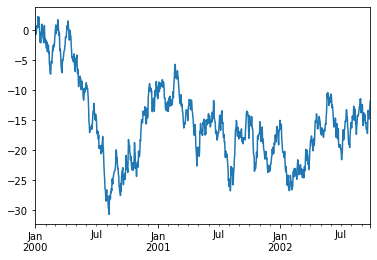

In [120]:
ts.plot()

In [121]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) 

In [122]:
df = df.cumsum()

使用`plt`绘图，具体参数设置可以查阅matplotlib官方文档

<Figure size 432x288 with 0 Axes>

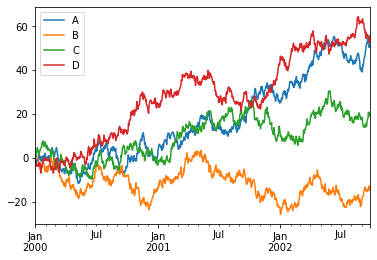

In [123]:
plt.figure(); df.plot(); plt.legend(loc='best')

## 导入导出数据

**将数据写入`csv`，如果有中文需要注意编码**

In [124]:
# df.to_csv('foo.csv')

从`csv`中读取数据

In [125]:
# pd.read_csv('foo.csv').head()

将数据导出为`hdf`格式

In [126]:
# df.to_hdf('foo.h5','df')

从`hdf`文件中读取数据前五行

In [127]:
# pd.read_hdf('foo.h5','df').head()

将数据保存为`xlsx`格式

In [128]:
# df.to_excel('foo.xlsx', sheet_name='Sheet1')

从`xlsx`格式中按照指定要求读取sheet1中数据

In [129]:
# pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()